## Install requirements

In [1]:
!pip install -qr requirements.txt


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## Imports

In [2]:
import os

from IPython.display import display, Image, HTML
from extremitypathfinder.plotting import PlottingEnvironment

## Initialization

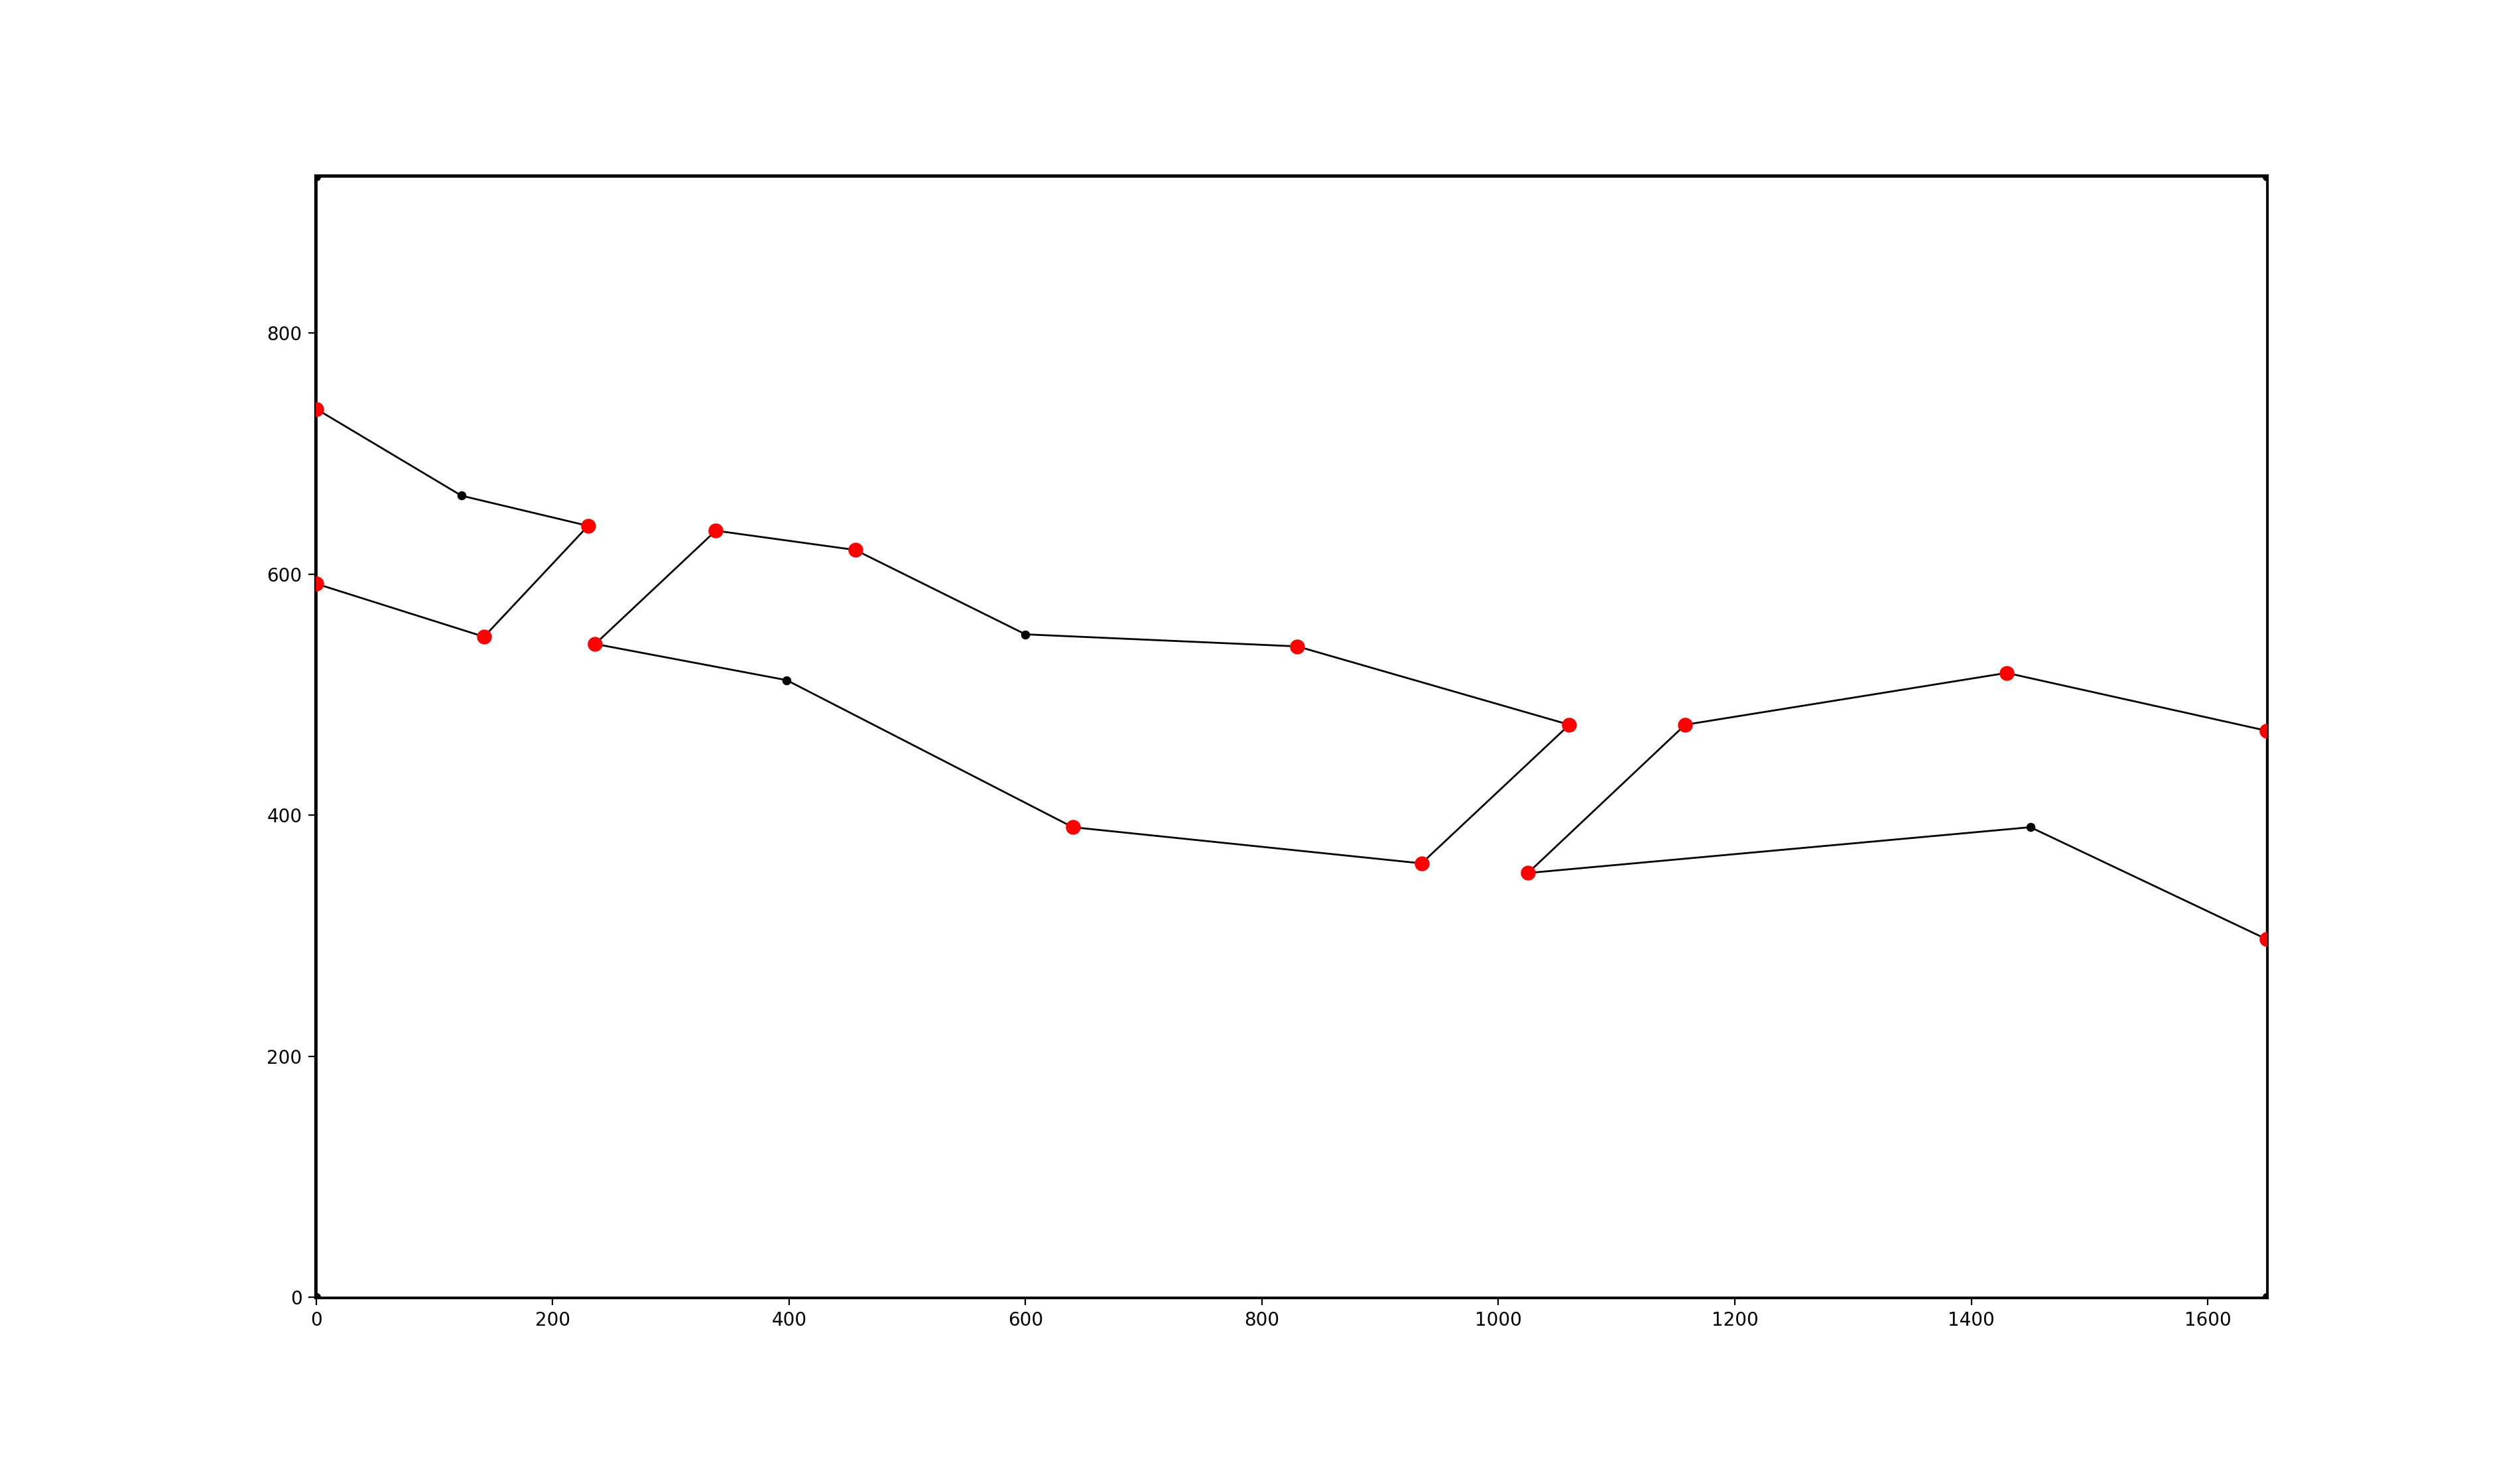

In [3]:
# Create the environment
plot_dir = 'plots'
environment = PlottingEnvironment(plotting_dir=plot_dir)
# Cleanup existing files
if os.path.exists(plot_dir) and os.path.isdir(plot_dir):
    files = os.listdir(plot_dir)
    for file in files:
        file_path = os.path.join(plot_dir, file)
        if os.path.isfile(file_path):
            os.remove(file_path)

# Define the boundaries: counter clockwise vertex numbering!
boundary_coordinates = [
    (1650, 0),
    (1650.0, 930.0),
    (0, 930.0),
    (0.0, 0.0)
    ]

# Define the holes: clockwise numbering!
list_of_holes = [
    [
        (0, 737),
        (123, 665),
        (230, 640),
        (142, 548),
        (0, 592)
    ],
    [
        (338, 636),
        (456, 620),
        (600, 550),
        (830, 540),
        (1060, 475),
        (935, 360),
        (640, 390),
        (398, 512),
        (236, 542)
    ],
    [
        (1158, 475),
        (1430, 518),
        (1650, 470),
        (1650, 297),
        (1450, 390),
        (1025, 352),
    ]
]
environment.store(boundary_coordinates, list_of_holes, validate=False)

environment.prepare()

# Display the map

filename_prefix = 'map_plot'
files = os.listdir(plot_dir)
for file in files:
    # Check if the file starts with the filename_prefix
    if file.startswith(filename_prefix):
        # Display the file
        if file.endswith('.png') or file.endswith('.jpg'):
            display(Image(os.path.join(plot_dir, file)))

## Find a path between two coordinates

[(400.0, 200.0), (935.0, 360.0), (1060.0, 475.0), (900.0, 800.0)]
1090.5157208979645


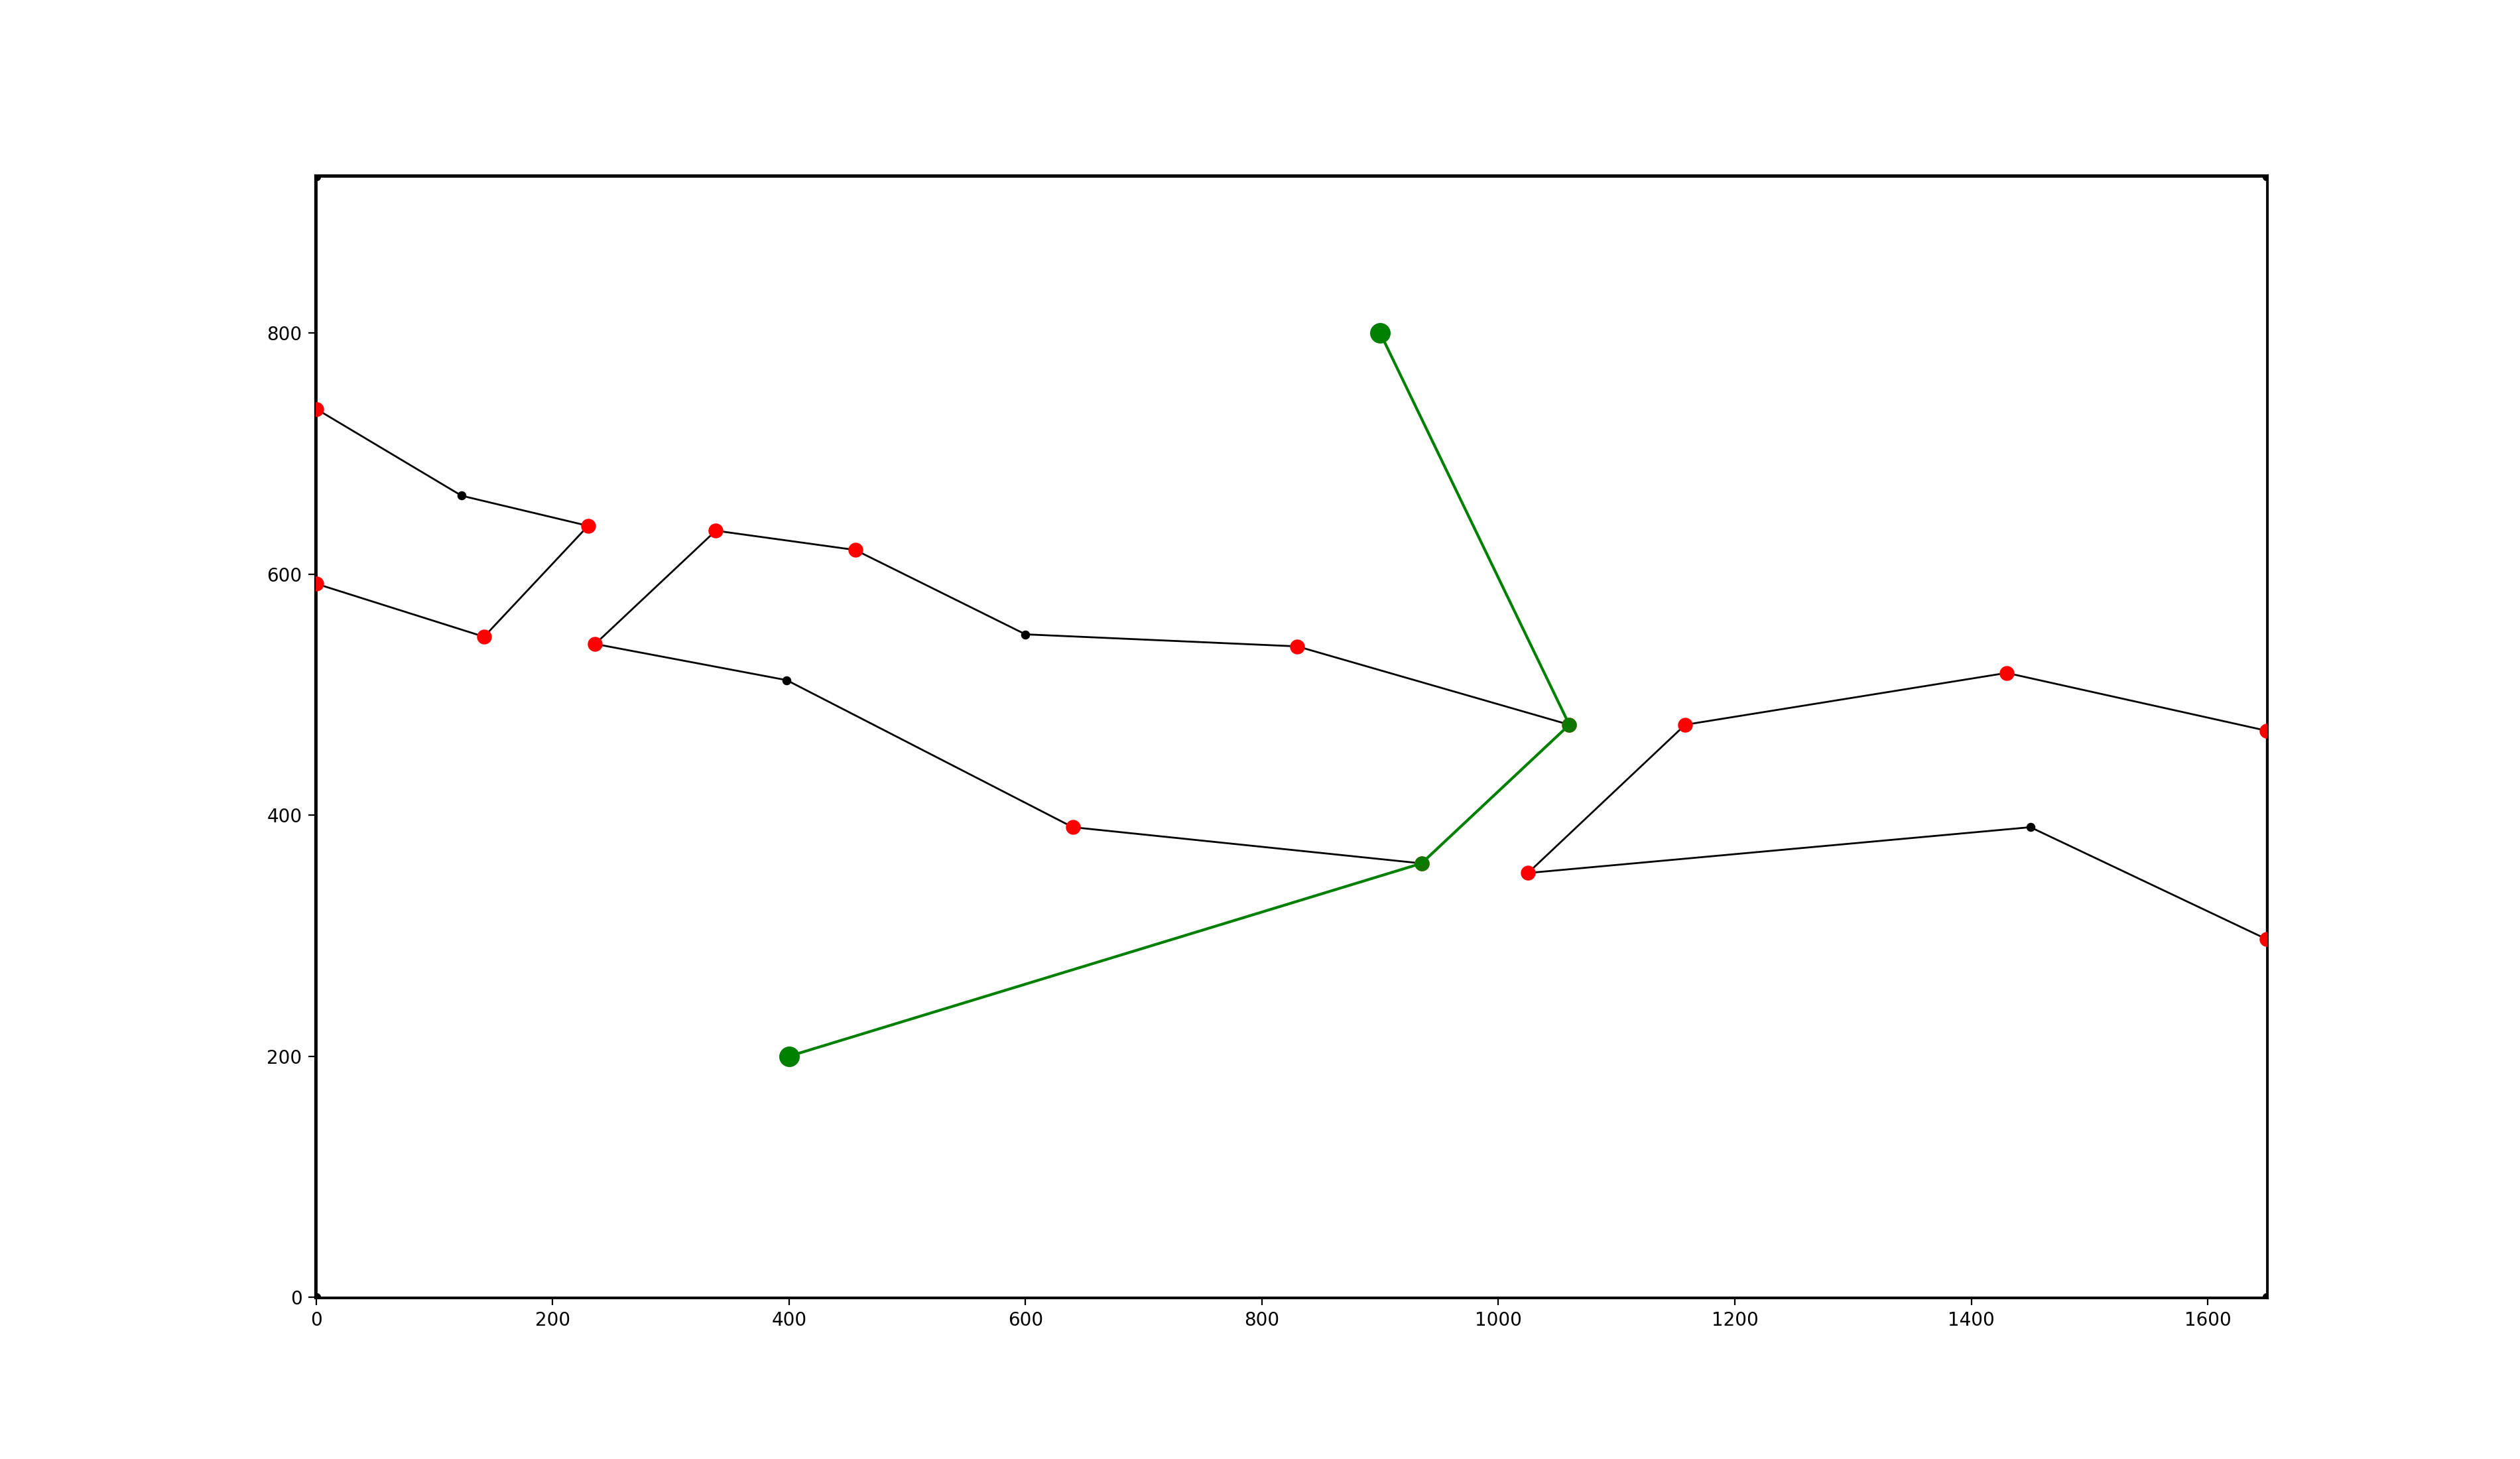

In [4]:
start_coordinates = (400, 200)
goal_coordinates = (900, 800)

# Cleanup existing files
filename_prefixes = ['path_', 'graph_']
if os.path.exists(plot_dir) and os.path.isdir(plot_dir):
    files = os.listdir(plot_dir)
    for file in files:
        if file.startswith(filename_prefixes[0]) or file.startswith(filename_prefixes[1]):
            file_path = os.path.join(plot_dir, file)
            if os.path.isfile(file_path):
                os.remove(file_path)

# Find best path
path, length = environment.find_shortest_path(start_coordinates, goal_coordinates)
print(path)
print(length)

# Display the path
plot_dir = 'plots'
filename_prefix = 'path_plot'
files = os.listdir(plot_dir)
for file in files:
    if file.startswith(filename_prefix):
        if file.endswith('.png') or file.endswith('.jpg'):
            display(Image(os.path.join(plot_dir, file)))